# Final Project - Indoor Localization with BLE Beacons and RSSI

## 1. Problem

Identifying the position based on the RSSI reading from the 13 Bluetooth Beacons distributed in the area.

The figure below shows the area and how the beacons, represented by numbered green balls, are distributed. The image also points how the area was divided in equal squares of 10 squared feets (3 squared meters).

<img src='https://drive.google.com/uc?id=1jhkOIJhF70v3fqfJEw8UhRs5I0mRvlie'>

## 2. Data

I'm using a dataset posted on Kaggle, it was used in the research paper:

*M. Mohammadi, A. Al-Fuqaha, M. Guizani, J. Oh, “Semi-supervised Deep Reinforcement Learning in Support of IoT and Smart City Services,” IEEE Internet of Things Journal, Vol. PP, No. 99, 2017.*

* Source: https://www.kaggle.com/mehdimka/ble-rssi-dataset

The data was collected in the first floor of Waldo Library in Western Michigan University, using a iPhone 6S.

## 3. Evaluation

The evaluation is done by calculating the **euclidian distance** between a position and the position predicted by te network.


## 4. Features

Some information about the data:

* The dataset has two sub-datasets: a labeled dataset of 1420 instances and an unlabeled dataset of 5191 instances
* The labeled dataset, the input data contains the location (label column), a timestamp, followed by RSSI readings of 13 iBeacons


# Setting Workspace

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Euclidian Distance between Two Points (Evaluation Metric)

It will be used to compare the actual position with the predicted position

In [ ]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    print('MAE: %.3f' % (np.mean(dists)))
    print('MSE: %.3f' % (np.mean(np.square(dists))))
    return dists

# Multilayer Perceptron Model

## Getting Data Ready 

In [ ]:
file = 'drive/My Drive/CBPF/Deep Learning/Projeto/iBeacon_RSSI_Labeled.csv'
data = pd.read_csv(file)
data

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [ ]:
# Number of unique positions measured 

len(data['location'].unique())

105

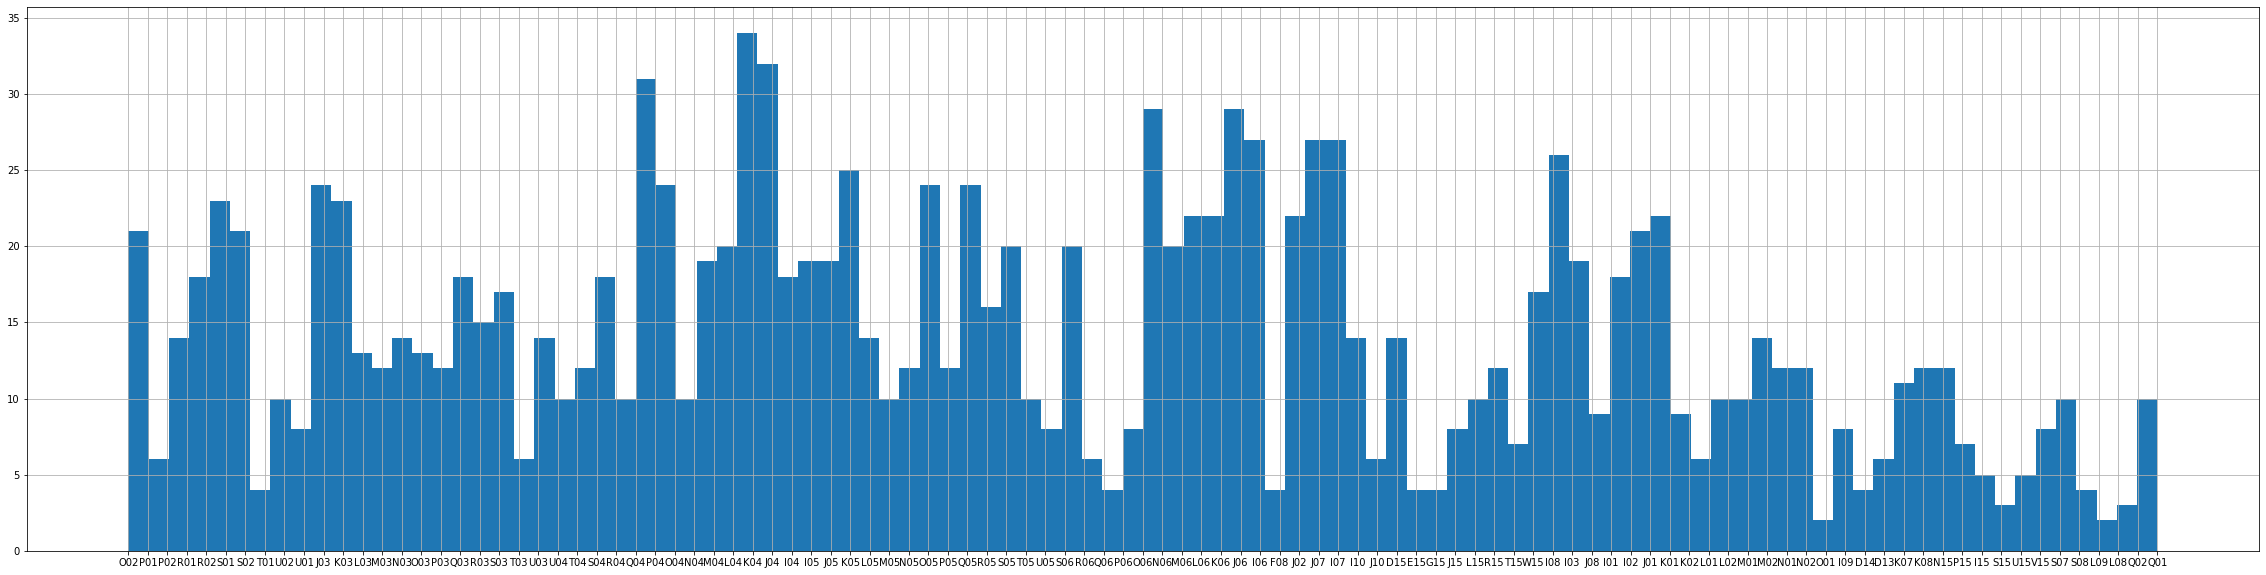

In [ ]:
data['location'].hist(bins=100, figsize=[40, 10]);

Inputs originally came with locations formated with letters rather than numbers so we need to correct them.

In [ ]:
def fix_pos(x_cord):
    x = 87 - ord(x_cord.upper())
    return x

data['x'] = data['location'].str[0]
data['y'] = data['location'].str[1:]
data.drop(["location"], axis = 1, inplace = True)
data["x"] = data["x"].apply(fix_pos)
data["y"] = data["y"].astype(int)

data.head()

,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,x,y
0,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,8,2
1,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,7,1
2,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
3,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
4,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1


Seeing which positions have measures

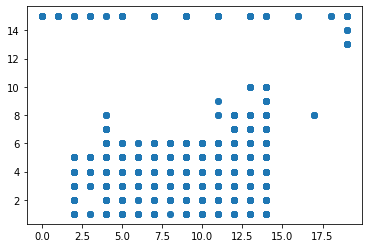

In [ ]:
plt.scatter(data["x"], data["y"],)
plt.show()

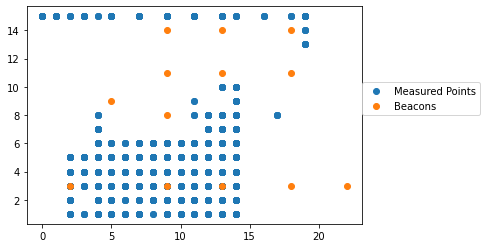

In [ ]:
# Coordinates of all the 13 beacons
beacon_coords = np.array([[5, 9], [9, 14], [13, 14], [18, 14], [9, 11], [13, 11], [18, 11], [9, 8], [2, 3], [9, 3], [13, 3], [18, 3], [22, 3]])

plt.scatter(data["x"], data["y"],)
plt.scatter(beacon_coords[:, 0], beacon_coords[:,1],)
plt.legend(['Measured Points', 'Beacons'], loc=[1, 0.5])
plt.show()

Splitting the data

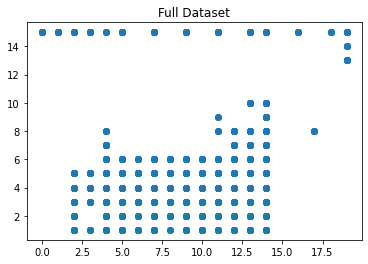

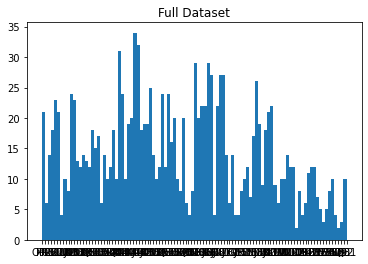

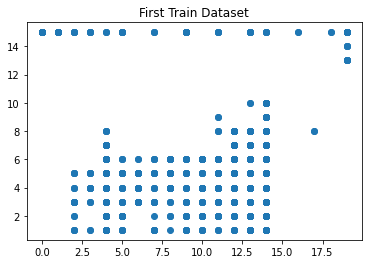

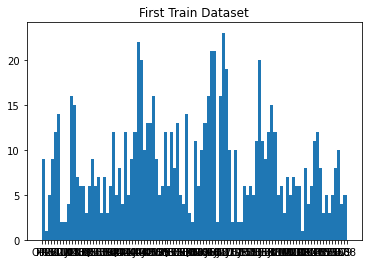

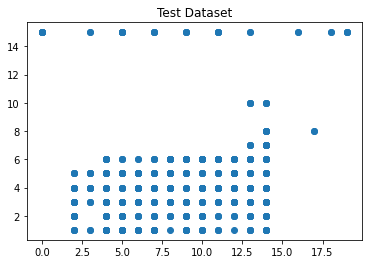

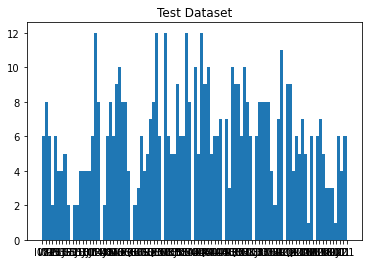

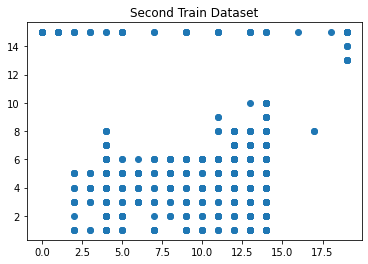

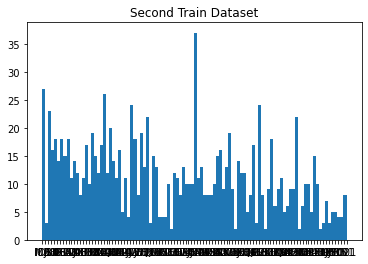

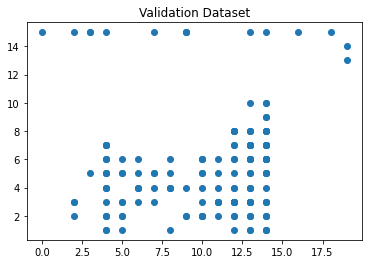

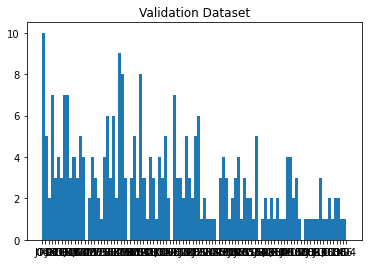

In [ ]:
y = data.iloc[:, -2:]
y = y.astype('float32')
X = data.iloc[:, 1:-2]

# Data in its old format
file = 'drive/My Drive/CBPF/Deep Learning/Projeto/iBeacon_RSSI_Labeled.csv'
data_old = pd.read_csv(file)

seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
data_train, data_test = train_test_split(data_old, test_size = 0.4, shuffle = False)


plt.scatter(data["x"], data["y"],)
plt.title('Full Dataset')
plt.show()
#
plt.hist(data_old["location"], bins=100)
plt.title('Full Dataset')
plt.show()
###
plt.scatter(y_train["x"], y_train["y"],)
plt.title('First Train Dataset')
plt.show()
#
plt.hist(data_train["location"], bins=100)
plt.title('First Train Dataset')
plt.show()
###
plt.scatter(y_test["x"], y_test["y"],)
plt.title('Test Dataset')
plt.show()
#
plt.hist(data_test["location"], bins=100)
plt.title('Test Dataset')
plt.show()

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True)
data_train_2, data_val = train_test_split(data_old, test_size = 0.2, shuffle = True)

###
plt.scatter(y_train_2["x"], y_train_2["y"],)
plt.title('Second Train Dataset')
plt.show()
#
plt.hist(data_train_2["location"], bins=100)
plt.title('Second Train Dataset')
plt.show()
###
plt.scatter(y_val["x"], y_val["y"],)
plt.title('Validation Dataset')
plt.show()
#
plt.hist(data_val["location"], bins=100)
plt.title('Validation Dataset')
plt.show()

## Creating Base Model

In [ ]:
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

def create_deep(input_dim):
  seed = 7
  np.random.seed(seed)
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(2, activation='relu'))
  model.compile(loss='mse', optimizer=Adam(0.001))
  return model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, 
                               mode='auto', restore_best_weights=True)

model = create_deep(X_train.shape[1])
out = model.fit(x = X_train_2, y = y_train_2, 
                validation_data = (X_val, y_val), 
                epochs=1000, 
                batch_size=1000,  
                verbose=0, 
                callbacks = [early_stopping])

## Evaluating the Base Model

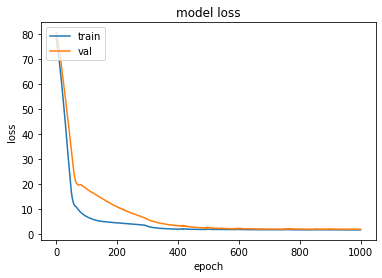

In [ ]:
# summarize history for loss
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
mse = model.evaluate(X_val, y_val, verbose=0)
print(mse)

1.927069902420044


## K-fold Cross-Validation

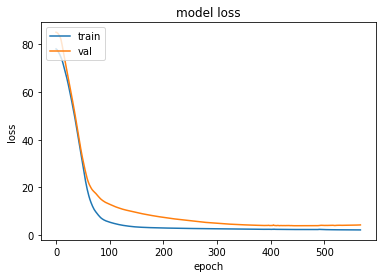

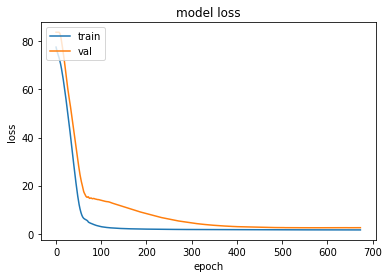

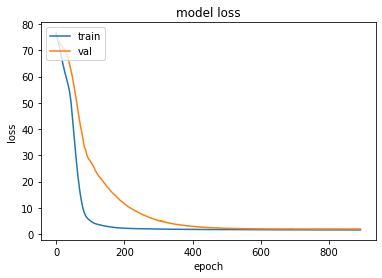

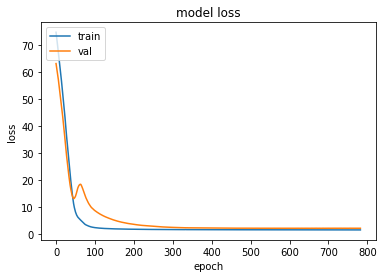

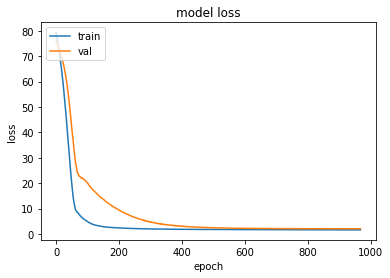

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
  results = list()
  hist = list()
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
  # enumerate folds
  for train_ix, val_ix in cv.split(X):
    # prepare data
    X_train, X_val = X[train_ix], X[val_ix]
    y_train, y_val = y[train_ix], y[val_ix]
    # define model
    model = create_deep(X_train.shape[1])
    # fit model
    early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='auto', restore_best_weights=True)
    out = model.fit(x = X_train, y = y_train, 
                validation_data = (X_val, y_val), 
                epochs=1000, 
                batch_size=1000,  
                verbose=0, 
                callbacks = [early_stopping])
    # evaluate model on test set
    mse = model.evaluate(X_val, y_val, verbose=0)
    # store result
    print('>%.3f' % mse)
    results.append(mse)
    hist.append(out)
  return results, hist
 
# load dataset
X_train_np = np.array(X_train_2)
y_train_np = np.array(y_train_2)

# evaluate model
results, hist = evaluate_model(X_train_np, y_train_np)

# summarize performance
print('MSE: %.3f (%.3f)' % (np.mean(results), np.std(results)))


for i in range(0, 5):
  plt.plot(hist[i].history['loss'])
  plt.plot(hist[i].history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# >3.836
# >2.490
# >1.934
# >2.140
# >2.036
# MSE: 2.487 (0.700)

## Training with full dataset

18/18 [==============================] - 0s 1ms/step - loss: 2.1417
Test result: >2.142


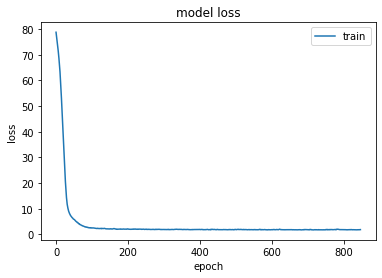

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


X_frames = [X_train_2, X_val]
y_frames = [y_train_2, y_val]

X_train_shuffled = pd.concat(X_frames)
y_train_shuffled = pd.concat(y_frames)


model = create_deep(X_train.shape[1])
# fit model
#model.fit(X_train, y_train, verbose=0, epochs=100)
early_stopping = EarlyStopping(monitor='loss', patience=100, verbose=0, mode='auto', restore_best_weights=True)
out = model.fit(x = X_train_shuffled, y = y_train_shuffled,  
            epochs=1000, 
            batch_size=800,  
            verbose=0, 
            callbacks = [early_stopping])

mse = model.evaluate(X_test, y_test)
print('Test result: >%.3f' % mse)

plt.plot(out.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

Calculating euclidian error

In [ ]:
preds = model.predict(X_test)
l2dists = l2_dist((preds[:, 0], preds[:, 1]), (y_test["x"], y_test["y"]))

MAE: 1.767
MSE: 4.283


In [ ]:
df = y_test 
df['error'] = l2dists
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,error
852,14.0,8.0,1.097581
853,14.0,8.0,2.060791
854,14.0,8.0,0.089366
855,14.0,8.0,0.095633
856,14.0,8.0,1.103557


Heatmap of average euclidian error

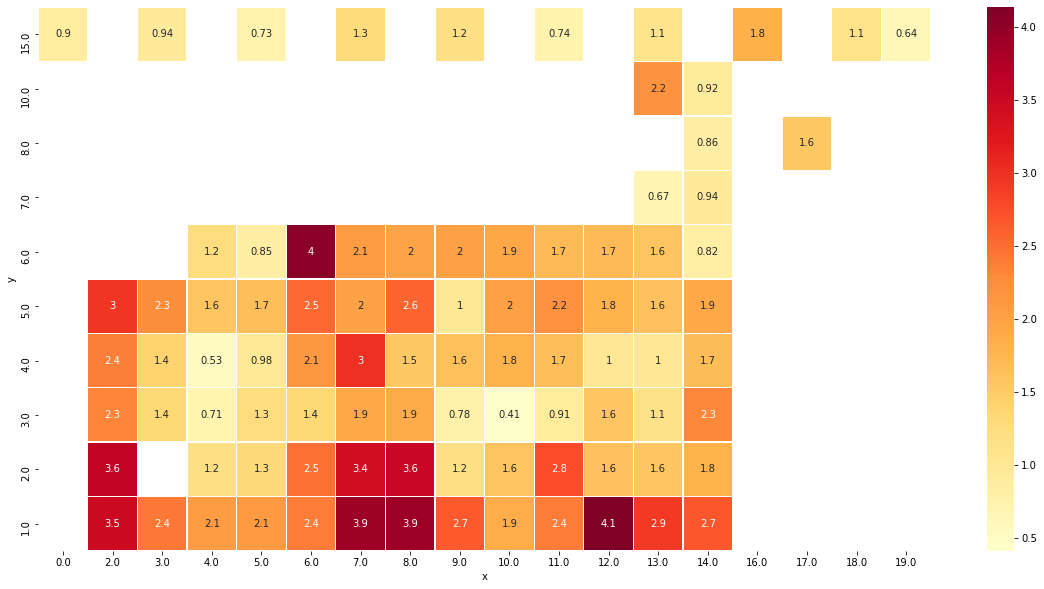

In [ ]:
import seaborn as sns

heatmap_data = pd.pivot_table(df, values='error', 
                              index='y', 
                              columns='x', 
                              aggfunc='mean',)
                              #fill_value=0)
#heatmap_data.head()

#sns.clustermap(heatmap_data, cmap="mako", row_cluster=False, col_cluster=False , cbar_pos=(0, .2, .03, .4))
#plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
#            dpi=150, figsize=(8,12))

fig, ax = plt.subplots(figsize=(20,10))

heatmap_data.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(heatmap_data, annot=True, linewidths=0.4, cmap="YlOrRd", ax=ax)
#sns.heatmap(heatmap_data, linewidths=0.4, cmap="YlOrRd")

Adjust the metric to meters

In [ ]:
preds_real = preds * 3.0
y_test_real = y_test * 3.0
l2dists_real = l2_dist((preds_real[:, 0], preds_real[:, 1]), (y_test_real["x"], y_test_real["y"]))

MAE: 5.300
MSE: 38.550


* CDF tell us the probability of a random variable X be lesser or equal to x --> **P(X <= x)**.

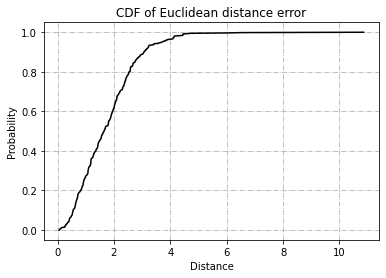

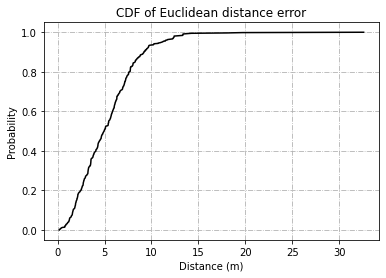

In [ ]:
sortedl2 = np.sort(l2dists)
prob = 1.0 * np.arange(len(sortedl2)) / (len(sortedl2) - 1) 
fig, ax = plt.subplots()
lg1 = ax.plot(sortedl2, prob, color='black')

plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

#######################

sortedl2 = np.sort(l2dists_real)
prob = 1.0 * np.arange(len(sortedl2)) / (len(sortedl2) - 1) 
fig, ax = plt.subplots()
lg1 = ax.plot(sortedl2, prob, color='black')

plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

#plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()

## Analysing Improvements with Talos

In [ ]:
!pip install talos

In [ ]:
import talos
print(talos.__version__)

1.0.0


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='auto', restore_best_weights=True)

def model_talos(X_train, y_train, X_val, y_val, params):
  seed = 7
  np.random.seed(seed)
  model = Sequential()
  model.add(Dense(params['first_neuron'], input_dim=X_train.shape[1], activation=params['activation1']))
  model.add(BatchNormalization())
  model.add(Dense(params['second_neuron'], activation=params['activation2']))
  model.add(Dense(params['third_neuron'], activation=params['activation3']))
  model.add(Dropout(params['dropout']))
  model.add(Dense(2, activation=params['last_activation']))

  #model.compile(loss='mse', optimizer=Adam(.001), metrics=['mse'])
  model.compile(loss='mse', optimizer=Adam(params['lr']), metrics=[tf.keras.metrics.RootMeanSquaredError(), 'accuracy'])

  out = model.fit(x = X_train, y = y_train, 
                validation_data = (X_val, y_val), 
                epochs=params['epochs'], 
                batch_size=params['batch_size'],  
                verbose=1, 
                callbacks = [early_stopping])

  return out, model

In [ ]:
p = {
    'first_neuron':[100, 50],
    'second_neuron':[100, 50],
    'third_neuron':[100, 50],
    'epochs': [1000],
    'dropout': [0.3, 0.5],
    'activation1':['sigmoid'],
    'activation2':['relu'],
    'activation3':['relu'],
    'last_activation': ['relu'],
    'lr': [0.001, 0.0005, 0.0001],
    'batch_size': [32, 64]
}

In [ ]:
X_np = np.array(X)
y_np = np.array(y)

In [ ]:
t = talos.Scan(x=X_np,
            y=y_np,
            params=p,
            model=model_talos,
            experiment_name='drive/My Drive/CBPF/Deep Learning/Projeto/projeto-final_talos',
            val_split=0.2,
            #shuffle = False,
            random_method='quantum',
            fraction_limit=0.1)



  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 59.5429 - root_mean_squared_error: 7.7164 - accuracy: 0.6664 - val_loss: 48.8405 - val_root_mean_squared_error: 6.9886 - val_accuracy: 0.8415
Epoch 2/1000
36/36 [==============================] - 0s 5ms/step - loss: 28.8717 - root_mean_squared_error: 5.3732 - accuracy: 0.8389 - val_loss: 29.3818 - val_root_mean_squared_error: 5.4205 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 12.0947 - root_mean_squared_error: 3.4777 - accuracy: 0.8644 - val_loss: 21.2906 - val_root_mean_squared_error: 4.6142 - val_accuracy: 0.8415
Epoch 4/1000
36/36 [==============================] - 0s 5ms/step - loss: 8.9653 - root_mean_squared_error: 2.9942 - accuracy: 0.8891 - val_loss: 16.4842 - val_root_mean_squared_error: 4.0601 - val_accuracy: 0.8803
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 7.2310 - root_mean_squared_error: 2.6890 - accuracy: 0.9058 - v



 11%|█         | 1/9 [00:43<05:47, 43.41s/it]

Epoch 1/1000
18/18 [==============================] - 0s 11ms/step - loss: 52.5863 - root_mean_squared_error: 7.2516 - accuracy: 0.1937 - val_loss: 29.5263 - val_root_mean_squared_error: 5.4338 - val_accuracy: 0.1585
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 20.5317 - root_mean_squared_error: 4.5312 - accuracy: 0.6048 - val_loss: 17.9155 - val_root_mean_squared_error: 4.2327 - val_accuracy: 0.8415
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.9873 - root_mean_squared_error: 2.8262 - accuracy: 0.8706 - val_loss: 11.7090 - val_root_mean_squared_error: 3.4218 - val_accuracy: 0.8415
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 5.7724 - root_mean_squared_error: 2.4026 - accuracy: 0.8900 - val_loss: 9.2892 - val_root_mean_squared_error: 3.0478 - val_accuracy: 0.8732
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 4.9318 - root_mean_squared_error: 2.2208 - accuracy: 0.9005 - va



 22%|██▏       | 2/9 [00:56<04:00, 34.42s/it]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 62.0304 - root_mean_squared_error: 7.8759 - accuracy: 0.6681 - val_loss: 48.3425 - val_root_mean_squared_error: 6.9529 - val_accuracy: 0.8415
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 42.6314 - root_mean_squared_error: 6.5293 - accuracy: 0.7931 - val_loss: 26.2649 - val_root_mean_squared_error: 5.1249 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 20.6994 - root_mean_squared_error: 4.5497 - accuracy: 0.8319 - val_loss: 10.1931 - val_root_mean_squared_error: 3.1927 - val_accuracy: 0.8415
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 12.9585 - root_mean_squared_error: 3.5998 - accuracy: 0.8327 - val_loss: 8.5401 - val_root_mean_squared_error: 2.9223 - val_accuracy: 0.8415
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 11.6483 - root_mean_squared_error: 3.4130 - accuracy: 0.8398 - 



 33%|███▎      | 3/9 [01:55<04:10, 41.83s/it]

Epoch 1/1000
18/18 [==============================] - 0s 12ms/step - loss: 67.9587 - root_mean_squared_error: 8.2437 - accuracy: 0.6734 - val_loss: 64.8043 - val_root_mean_squared_error: 8.0501 - val_accuracy: 0.6725
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 65.1406 - root_mean_squared_error: 8.0710 - accuracy: 0.6989 - val_loss: 63.8886 - val_root_mean_squared_error: 7.9930 - val_accuracy: 0.7606
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 62.4902 - root_mean_squared_error: 7.9051 - accuracy: 0.7218 - val_loss: 63.0440 - val_root_mean_squared_error: 7.9400 - val_accuracy: 0.7359
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 59.4196 - root_mean_squared_error: 7.7084 - accuracy: 0.7623 - val_loss: 62.1642 - val_root_mean_squared_error: 7.8844 - val_accuracy: 0.6972
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 56.1035 - root_mean_squared_error: 7.4902 - accuracy: 0.7879 



 44%|████▍     | 4/9 [03:03<04:07, 49.46s/it]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 44.7880 - root_mean_squared_error: 6.6924 - accuracy: 0.8398 - val_loss: 22.1389 - val_root_mean_squared_error: 4.7052 - val_accuracy: 0.8415
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 14.8848 - root_mean_squared_error: 3.8581 - accuracy: 0.8451 - val_loss: 11.2647 - val_root_mean_squared_error: 3.3563 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 5ms/step - loss: 10.2873 - root_mean_squared_error: 3.2074 - accuracy: 0.8565 - val_loss: 8.5949 - val_root_mean_squared_error: 2.9317 - val_accuracy: 0.8803
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 8.5856 - root_mean_squared_error: 2.9301 - accuracy: 0.8820 - val_loss: 6.6722 - val_root_mean_squared_error: 2.5831 - val_accuracy: 0.9014
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 8.0071 - root_mean_squared_error: 2.8297 - accuracy: 0.8882 - val



 56%|█████▌    | 5/9 [03:56<03:21, 50.47s/it]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 54.1070 - root_mean_squared_error: 7.3557 - accuracy: 0.3239 - val_loss: 23.4397 - val_root_mean_squared_error: 4.8415 - val_accuracy: 0.7711
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 18.6015 - root_mean_squared_error: 4.3129 - accuracy: 0.7350 - val_loss: 22.5438 - val_root_mean_squared_error: 4.7480 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 7.3340 - root_mean_squared_error: 2.7081 - accuracy: 0.8750 - val_loss: 11.8039 - val_root_mean_squared_error: 3.4357 - val_accuracy: 0.8415
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 6.0739 - root_mean_squared_error: 2.4645 - accuracy: 0.8829 - val_loss: 10.4655 - val_root_mean_squared_error: 3.2350 - val_accuracy: 0.8732
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.0455 - root_mean_squared_error: 2.2462 - accuracy: 0.9032 - va



 67%|██████▋   | 6/9 [05:15<02:57, 59.30s/it]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 60.6001 - root_mean_squared_error: 7.7846 - accuracy: 0.6162 - val_loss: 47.9445 - val_root_mean_squared_error: 6.9242 - val_accuracy: 0.8310
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 27.2953 - root_mean_squared_error: 5.2245 - accuracy: 0.8583 - val_loss: 21.3388 - val_root_mean_squared_error: 4.6194 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 5ms/step - loss: 8.9977 - root_mean_squared_error: 2.9996 - accuracy: 0.8706 - val_loss: 12.4333 - val_root_mean_squared_error: 3.5261 - val_accuracy: 0.8415
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 6.7019 - root_mean_squared_error: 2.5888 - accuracy: 0.9129 - val_loss: 10.2035 - val_root_mean_squared_error: 3.1943 - val_accuracy: 0.8944
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 6.0731 - root_mean_squared_error: 2.4644 - accuracy: 0.9137 - va



 78%|███████▊  | 7/9 [05:35<01:34, 47.32s/it]

Epoch 1/1000
18/18 [==============================] - 0s 12ms/step - loss: 70.4460 - root_mean_squared_error: 8.3932 - accuracy: 0.6514 - val_loss: 70.5484 - val_root_mean_squared_error: 8.3993 - val_accuracy: 0.8415
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 68.3240 - root_mean_squared_error: 8.2658 - accuracy: 0.6831 - val_loss: 68.5408 - val_root_mean_squared_error: 8.2789 - val_accuracy: 0.8415
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 65.5431 - root_mean_squared_error: 8.0959 - accuracy: 0.7597 - val_loss: 66.4264 - val_root_mean_squared_error: 8.1502 - val_accuracy: 0.8415
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 62.9401 - root_mean_squared_error: 7.9335 - accuracy: 0.8204 - val_loss: 64.3198 - val_root_mean_squared_error: 8.0200 - val_accuracy: 0.8415
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 60.2040 - root_mean_squared_error: 7.7591 - accuracy: 0.8301 



 89%|████████▉ | 8/9 [06:46<00:54, 54.45s/it]

Epoch 1/1000
36/36 [==============================] - 0s 8ms/step - loss: 62.4489 - root_mean_squared_error: 7.9025 - accuracy: 0.7218 - val_loss: 43.7345 - val_root_mean_squared_error: 6.6132 - val_accuracy: 0.8415
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 32.9863 - root_mean_squared_error: 5.7434 - accuracy: 0.8433 - val_loss: 13.7701 - val_root_mean_squared_error: 3.7108 - val_accuracy: 0.8415
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 13.3973 - root_mean_squared_error: 3.6602 - accuracy: 0.8468 - val_loss: 11.8375 - val_root_mean_squared_error: 3.4406 - val_accuracy: 0.8415
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 10.2027 - root_mean_squared_error: 3.1942 - accuracy: 0.8433 - val_loss: 9.0044 - val_root_mean_squared_error: 3.0007 - val_accuracy: 0.8415
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 8.9889 - root_mean_squared_error: 2.9982 - accuracy: 0.8574 - v



100%|██████████| 9/9 [07:44<00:00, 51.61s/it]


In [ ]:
# path = 'drive/My Drive/CBPF/Deep Learning/Projeto/projeto-final_talos/'
# r = talos.Reporting(path + '112420032803.csv')
# r.data

In [ ]:
t.data

,start,end,duration,round_epochs,loss,root_mean_squared_error,accuracy,val_loss,val_root_mean_squared_error,val_accuracy,activation1,activation2,activation3,batch_size,dropout,epochs,first_neuron,last_activation,lr,second_neuron,third_neuron
0,11/24/20-032804,11/24/20-032847,43.219922,247,2.820611,1.679468,0.934859,2.294327,1.514704,0.915493,sigmoid,relu,relu,32,0.3,1000,50,relu,0.0005,100,100
1,11/24/20-032847,11/24/20-032901,13.248660,129,2.936033,1.713486,0.933099,4.167902,2.041544,0.919014,sigmoid,relu,relu,64,0.3,1000,100,relu,0.0010,100,100
2,11/24/20-032901,11/24/20-033000,58.888643,335,3.787375,1.946118,0.930458,1.986767,1.409527,0.919014,sigmoid,relu,relu,32,0.5,1000,100,relu,0.0005,50,50
3,11/24/20-033000,11/24/20-033107,67.054577,618,3.071121,1.752461,0.927817,1.941589,1.393409,0.911972,sigmoid,relu,relu,64,0.3,1000,100,relu,0.0001,100,50
4,11/24/20-033107,11/24/20-033200,52.606472,302,3.725962,1.930275,0.929577,2.128216,1.458841,0.926056,sigmoid,relu,relu,32,0.5,1000,100,relu,0.0010,100,50
5,11/24/20-033200,11/24/20-033320,79.705947,443,2.420394,1.555762,0.928697,1.786222,1.336496,0.911972,sigmoid,relu,relu,32,0.3,1000,100,relu,0.0005,100,100
6,11/24/20-033320,11/24/20-033339,19.167824,113,2.909803,1.705814,0.933979,3.462126,1.860679,0.922535,sigmoid,relu,relu,32,0.3,1000,50,relu,0.0005,100,100
7,11/24/20-033339,11/24/20-033450,70.858609,653,3.626136,1.904241,0.925176,1.890582,1.374984,0.908451,sigmoid,relu,relu,64,0.5,1000,50,relu,0.0001,100,100
8,11/24/20-033450,11/24/20-033548,57.905808,332,3.255292,1.804243,0.932218,1.788568,1.337373,0.922535,sigmoid,relu,relu,32,0.5,1000,50,relu,0.0005,100,100


In [ ]:
best_model = t.best_model(metric='val_loss', asc=True)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 22,202
Trainable params: 22,002
Non-trainable params: 200
__________________________________________________

In [ ]:
preds = best_model.predict(X_val)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (y_val["x"], y_val["y"]))
print(l2dists_mean)

1.8286629


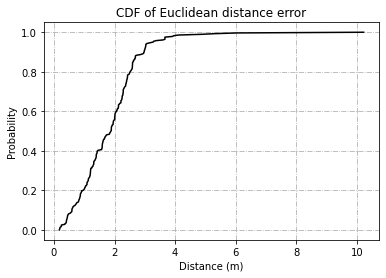

In [ ]:
sortedl2 = np.sort(l2dists)
prob = 1.0 * np.arange(len(sortedl2)) / (len(sortedl2) - 1) 
fig, ax = plt.subplots()
lg1 = ax.plot(sortedl2, prob, color='black')

plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

#plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()

In [ ]:
#r.data.loc[r.data['val_loss'] == np.min(r.data['val_loss'])].index.values[0]
t.data.loc[t.data['val_loss'] == np.min(t.data['val_loss'])]

,start,end,duration,round_epochs,loss,root_mean_squared_error,accuracy,val_loss,val_root_mean_squared_error,val_accuracy,activation1,activation2,activation3,batch_size,dropout,epochs,first_neuron,last_activation,lr,second_neuron,third_neuron
5,11/24/20-033200,11/24/20-033320,79.705947,443,2.420394,1.555762,0.928697,1.786222,1.336496,0.911972,sigmoid,relu,relu,32,0.3,1000,100,relu,0.0005,100,100
